In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from itertools import combinations

In [ ]:
!pip install openpyxl --upgrade

## ppf

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/ALL_FQ.xlsx')
suebit_list = list(df['SUEBIT'].dropna())
uebit_list = list(df['UEBIT'].dropna())

In [ ]:
ppf_list = ['-5', '-10', '-15', '-20', '-25', '-30', '+30', '+25', '+20', '+15', '+10' ,'+5']
suebit_ppf = []
uebit_ppf = []
for i in [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]:
  suebit_ppf.append(np.quantile(a = suebit_list, q = i))
  uebit_ppf.append(np.quantile(a = uebit_list, q = i))

In [ ]:
data = {'ppf' : ppf_list, 'suebit_ppf' : suebit_ppf, 'uebit_ppf' : uebit_ppf}
ppf_df = pd.DataFrame(data)
ppf_df

,ppf,suebit_ppf,uebit_ppf
0,-5,-1.842410,-59.343725
1,-10,-1.336140,-46.573950
2,-15,-1.000338,-36.909050
3,-20,-0.747338,-29.569900
4,-25,-0.558326,-23.602250
5,-30,-0.407451,-18.580450
6,+30,0.240061,5.510200
7,+25,0.388449,8.948925
8,+20,0.599085,13.194400
9,+15,0.869012,18.464275


In [ ]:
ppf_df.to_excel('/content/drive/MyDrive/ppf.xlsx', index = False)

## descriptive statistics

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/OUT_SAMPLE_FQ_.xlsx')
df

,Ticker,Company Name,UEBIT,SUEBIT,EA,WH52,WL52,UPSIDE,FH,SIZE,VALUE,LEVERAGE,MOMENTUM,QUALITY,VOLATILITY,LIQUIDITY,CAR5,CAR10,CAR20,CAR30,CAR40,CAR50
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",NaN,0.201125,2019-04-20,13.684211,38.526316,51.157895,8.30,1.016776e+06,0.157321,21.1968,0.244421,10.6292,41.4100,NaN,2.350578,3.576352,1.043061,-0.982998,0.147679,-3.053639
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaT,77.489177,11.832612,NaN,0.36,3.264588e+04,2.865083,NaN,-0.075035,-0.4692,55.5802,3.047403e+10,6.747262,8.752212,0.789972,-6.023767,-8.011531,-6.051876
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaT,NaN,NaN,NaN,4.27,NaN,NaN,54.9671,NaN,6.5336,NaN,3.721473e+10,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,2.54,NaN,NaN,32.1887,NaN,4.1560,NaN,4.524818e+10,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,2.81,NaN,NaN,33.7715,NaN,-0.6576,NaN,8.826153e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23986,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23987,KOSE:A383220,"F&F Co., Ltd",36.6296,NaN,NaT,4.260090,59.641256,8.408072,12.07,NaN,NaN,63.7758,NaN,NaN,38.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23988,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaT,NaN,NaN,NaN,11.22,NaN,NaN,1.8683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23989,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.rename(columns={'WH52' : '52WH',	'WL52': '52WL', 'LEVERAGE' : 'LEVER', 'MOMENTUM' : 'MOM', 'QUALITY' : 'QUAL', 'VOLATILITY' : 'VOL', 'LIQUIDITY' : 'LIQUID'})
df = df.describe()
df = df.transpose()
df = round(df, 3)
df

,count,mean,std,min,25%,50%,75%,max
UEBIT,3652.0,-3.967000e+00,3.115800e+01,-99.554,-2.091300e+01,-2.260000e+00,1.416000e+01,9.839500e+01
SUEBIT,3753.0,-4.000000e-02,1.070000e+00,-3.231,-5.740000e-01,-4.300000e-02,4.290000e-01,3.968000e+00
52WH,7513.0,3.875400e+01,3.055100e+01,0.052,1.677100e+01,3.121700e+01,5.254700e+01,2.098480e+02
52WL,7845.0,3.504400e+01,2.081800e+01,0.100,1.757800e+01,3.401500e+01,5.028400e+01,1.000000e+02
UPSIDE,4510.0,3.253100e+01,1.901900e+01,-29.972,2.000300e+01,3.190200e+01,4.402600e+01,1.054050e+02
FH,20048.0,3.628000e+00,3.818000e+00,0.000,9.300000e-01,2.210000e+00,4.940000e+00,1.926000e+01
VALUE,6880.0,1.177000e+00,1.083000e+00,0.003,3.950000e-01,8.230000e-01,1.603000e+00,5.873000e+00
LEVER,20588.0,4.181300e+01,2.074900e+01,1.025,2.471900e+01,4.163800e+01,5.741500e+01,1.094990e+02
MOM,7394.0,7.000000e-03,2.130000e-01,-0.768,-1.220000e-01,-5.000000e-03,1.300000e-01,7.940000e-01
QUAL,17615.0,4.150000e+00,1.272800e+01,-52.590,-1.895000e+00,4.776000e+00,1.140400e+01,4.670900e+01


In [ ]:
df.to_excel('/content/drive/MyDrive/descriptive statistics(OUT_SAMPLE*).xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/ALL_FQ*.xlsx')
df

,Ticker,Company Name,UEBIT,SUEBIT,EA,WH52,WL52,UPSIDE,FH,SIZE,VALUE,LEVERAGE,MOMENTUM,QUALITY,VOLATILITY,LIQUIDITY,CAR5,CAR10,CAR20,CAR30,CAR40,CAR50
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",NaN,NaN,NaT,64.761905,13.571429,NaN,4.33,40530.00000,1.910548,NaN,-0.097472,8.0348,28.0826,1.513560e+11,0.126668,-6.166705,-8.751025,-13.396912,-13.092407,-12.472558
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaT,NaN,NaN,NaN,1.97,NaN,NaN,NaN,NaN,10.5740,NaN,1.178060e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaT,NaN,NaN,NaN,0.02,NaN,NaN,60.4769,NaN,7.3744,NaN,1.673777e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",NaN,NaN,NaT,28.612303,10.266584,NaN,14.93,70407.14256,1.866926,NaN,-0.021232,NaN,24.2926,1.663665e+10,-4.067167,-5.247927,-8.693880,-11.450243,-9.466512,-4.742978
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,1.04,NaN,NaN,33.2360,NaN,4.6468,NaN,3.983927e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85054,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85055,KOSE:A383220,"F&F Co., Ltd",36.6296,NaN,NaT,4.260090,59.641256,8.408072,12.07,NaN,NaN,63.7758,NaN,NaN,38.9529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85056,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaT,NaN,NaN,NaN,11.22,NaN,NaN,1.8683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85057,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.rename(columns={'WH52' : '52WH',	'WL52': '52WL', 'LEVERAGE' : 'LEVER', 'MOMENTUM' : 'MOM', 'QUALITY' : 'QUAL', 'VOLATILITY' : 'VOL', 'LIQUIDITY' : 'LIQUID'})
df = df.rename(columns={'A': 'a'})
df = df.describe()
df = df.transpose()
df = round(df, 3)
df

,count,mean,std,min,25%,50%,75%,max
UEBIT,10826.0,-7.626000e+00,2.853700e+01,-100.000,-2.360200e+01,-5.065000e+00,8.949000e+00,9.839500e+01
SUEBIT,10356.0,-6.700000e-02,1.016000e+00,-3.963,-5.580000e-01,-4.900000e-02,3.880000e-01,3.968000e+00
52WH,25665.0,3.687200e+01,2.867100e+01,-4.286,1.518200e+01,2.996300e+01,5.139400e+01,2.098480e+02
52WL,26746.0,2.836800e+01,1.859800e+01,0.100,1.338600e+01,2.529100e+01,4.085600e+01,1.000000e+02
UPSIDE,15366.0,3.436400e+01,1.970500e+01,-29.972,2.099900e+01,3.263400e+01,4.592000e+01,1.211800e+02
FH,60834.0,3.452000e+00,4.080000e+00,0.000,6.200000e-01,1.810000e+00,4.650000e+00,2.059000e+01
SIZE,23335.0,3.692328e+05,4.391151e+05,40.500,1.052433e+05,2.128680e+05,4.477799e+05,4.466245e+06
VALUE,23494.0,1.372000e+00,1.222000e+00,0.003,4.760000e-01,9.640000e-01,1.909000e+00,7.390000e+00
LEVER,59572.0,4.252800e+01,2.068700e+01,0.581,2.548500e+01,4.251000e+01,5.829200e+01,1.094990e+02
MOM,25474.0,5.000000e-03,1.910000e-01,-0.768,-1.170000e-01,2.000000e-03,1.220000e-01,7.940000e-01


In [ ]:
df.to_excel('/content/drive/MyDrive/descriptive statistics*.xlsx')

## new control set

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/ALL_FQ.xlsx')
df['Intercept'] = [1] * len(df['SIZE'])

In [ ]:
model = smf.ols(formula = 'CAR50 ~ UEBIT + VALUE + LEVERAGE + MOMENTUM + QUALITY + LIQUIDITY', data = df)
fit = model.fit()

In [ ]:
X = np.array(df[['Intercept',
                 'UEBIT',
                 'VALUE', 
                 'LEVERAGE', 
                 'MOMENTUM',
                 'QUALITY',
                 'LIQUIDITY']])

In [ ]:
X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)

In [ ]:
response = 'CAR50'
y = df[response]
variables = ['VALUE',
             'LEVERAGE',
             'MOMENTUM',
             'QUALITY',
             'LIQUIDITY']

In [ ]:
num_var = len(variables)
num_data = len(df)

In [ ]:
ad_r_list = []
aic_list = []
bic_list = []

In [ ]:
num_parameter = []
subsets = []
for p in range(num_var+1):
    if p == 0:
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None')
        sub_fit = smf.ols(exp,data=df).fit()
        ad_r = 0
        aic = sub_fit.aic
        bic = sub_fit.bic
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = smf.ols(exp,data=df).fit()
            ad_r = sub_fit.rsquared_adj
            aic = sub_fit.aic
            bic = sub_fit.bic
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            num_parameter.append(p+1)

In [ ]:
df_res = pd.DataFrame()
df_res['Variables'] = subsets
df_res['Number_of_parameter'] = num_parameter
df_res['Ad_R'] = ad_r_list
df_res['AIC'] = aic_list
df_res['BIC'] = bic_list

In [ ]:
df_res

,Variables,Number_of_parameter,Ad_R,AIC,BIC
0,None,1,0.000000,203881.195179,203889.308319
1,VALUE,2,0.000339,175029.535617,175045.456582
2,LEVERAGE,2,0.000682,182504.615573,182520.623867
3,MOMENTUM,2,0.000314,195545.929930,195562.077066
4,QUALITY,2,0.001798,133858.492237,133873.894000
5,LIQUIDITY,2,0.003368,200193.931912,200210.122606
6,"VALUE, LEVERAGE",3,0.001595,158761.675874,158785.269802
7,"VALUE, MOMENTUM",3,0.000627,168343.917925,168367.688383
8,"VALUE, QUALITY",3,0.001253,119610.032151,119632.792105
9,"VALUE, LIQUIDITY",3,0.003856,172403.361794,172427.199423


In [ ]:
df_res.to_excel('/content/drive/MyDrive/new control subset(UEBIT).xlsx', index = False)

## multico test

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/ALL_FQ.xlsx')

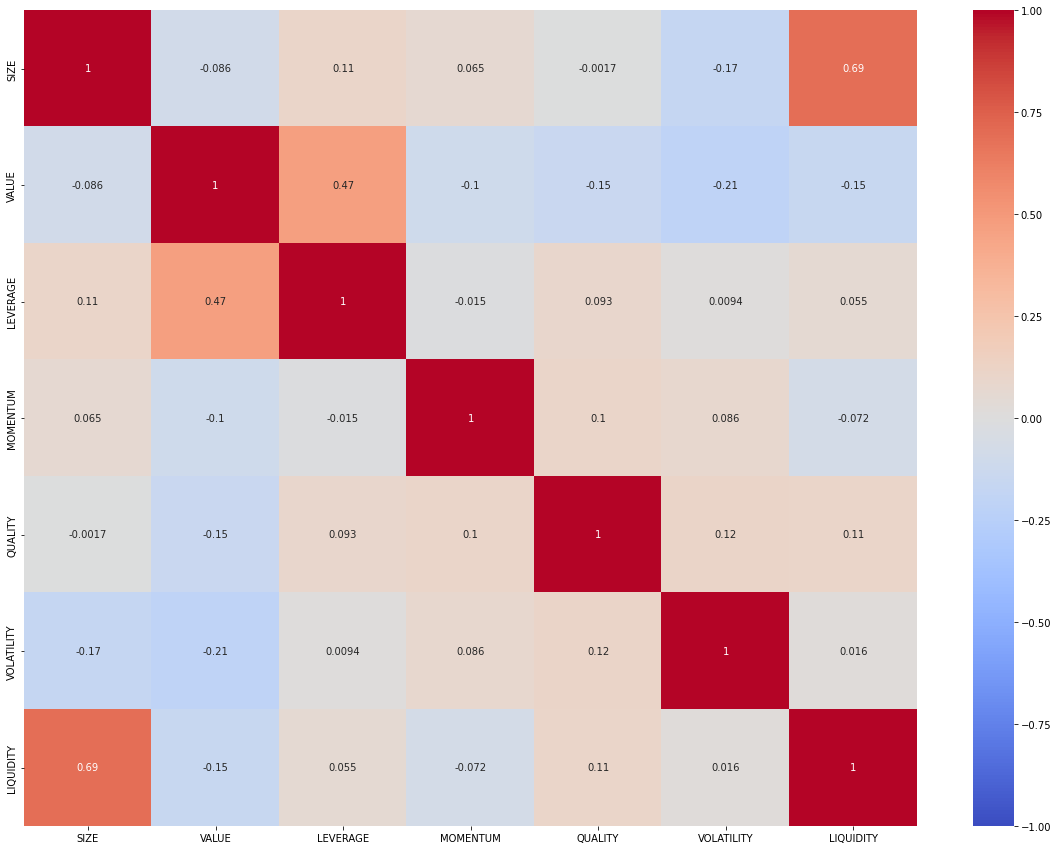

In [ ]:
df1 = df.iloc[:, [9, 10, 11, 12, 13, 14, 15]]
corr = df1.corr(method = 'pearson')
plt.rcParams["figure.figsize"] = (20,15)
sb.heatmap(corr,
           annot = True,
           cmap = 'coolwarm',
           vmin = -1, vmax=1,
          )

In [ ]:
df1[df1.isna()] = 0
vif = pd.DataFrame(
    [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])],
    index = df1.columns, columns = ['VIF'])
vif.sort_values(by = 'VIF', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,VIF
SIZE,16.486395
VOLATILITY,16.450321
LIQUIDITY,4.789561
LEVERAGE,4.635384
QUALITY,1.970583
VALUE,1.037932
MOMENTUM,1.012574


In [ ]:
vif.to_excel('/content/drive/MyDrive/VIF(control).xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/IN_SAMPLE_FQ.xlsx')

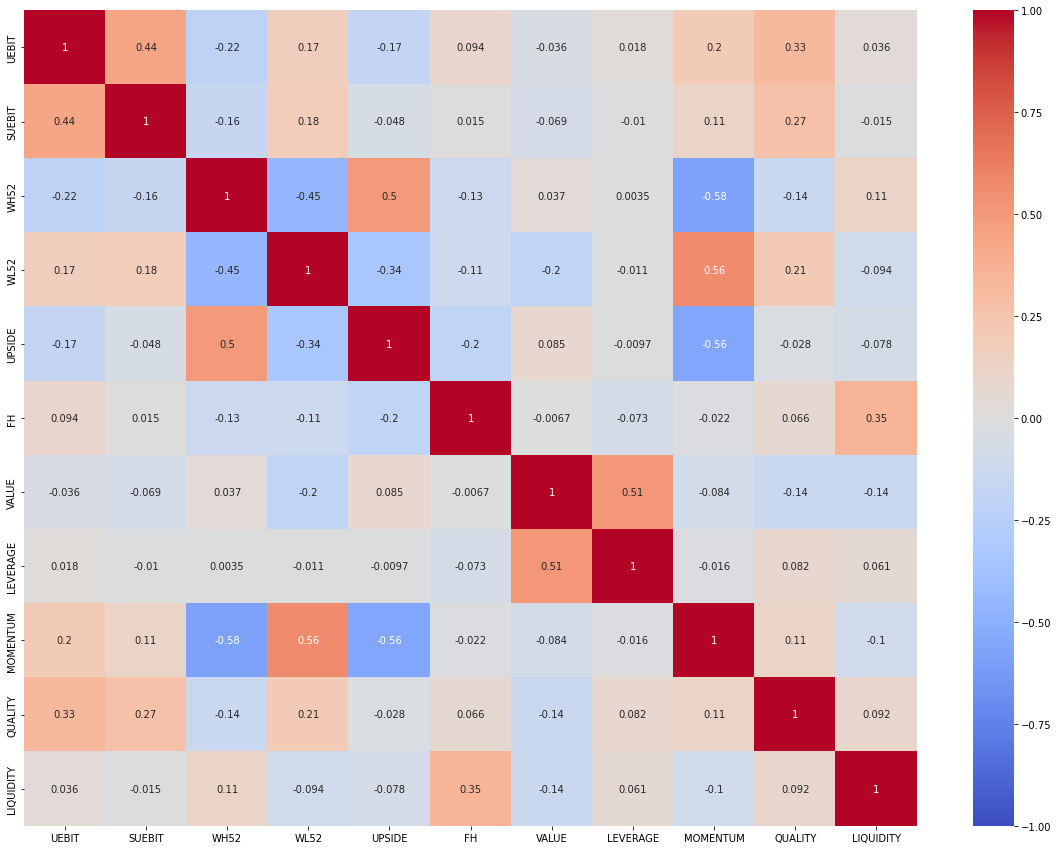

In [ ]:
df2 = df.iloc[:, [2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15]]
corr = df2.corr(method = 'pearson')
plt.rcParams["figure.figsize"] = (20,15)
sb.heatmap(corr,
           annot = True,
           cmap = 'coolwarm',
           vmin = -1, vmax=1,
          )

In [ ]:
df2[df2.isna()] = 0
vif = pd.DataFrame(
    [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])],
    index = df2.columns, columns = ['VIF'])
vif.sort_values(by = 'VIF', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,VIF
WL52,5.112654
WH52,4.978485
LIQUIDITY,4.582794
LEVERAGE,4.378239
QUALITY,2.051127
UPSIDE,1.947784
FH,1.492867
MOMENTUM,1.470772
UEBIT,1.103982
VALUE,1.043240


In [ ]:
vif.to_excel('/content/drive/MyDrive/VIF(signal+control).xlsx')

## dummy, years

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/OUT_SAMPLE_FQ.xlsx')

In [ ]:
for i, e in enumerate(list(range(2019, 2022))):
  df[e] = [0] * len(df['Ticker'])
  df[e][i * 8724:(i + 1) * 8724] = 1
  if e == 2021:
    df[e] = [0] * len(df['Ticker'])
    df[e][i * 8724:(i + 1) * 8724 - 2181] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/INDUSTRY(DUMMY)_python.xlsx')

In [ ]:
not_financial_df = pd.read_excel('/content/drive/MyDrive/not_financial_list.xlsx')
not_financial_list = list(not_financial_df.iloc[:, 1])
len(not_financial_list)

2186

In [ ]:
symbol_df = pd.read_excel('/content/drive/MyDrive/가공전/FH_processing.xlsx')
symbol_list = list(symbol_df['Symbol'])
len(symbol_list)

2295

In [ ]:
df1 = df1[df1['Ticker'].isin(not_financial_list)]
df1 = df1.reset_index(drop = True)
df1

,Ticker,Company Name,Unnamed: 2
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",Pharmaceuticals
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",Oil and Gas Storage and Transportation
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",Textiles
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",Pharmaceuticals
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",Paper Products
...,...,...,...
2181,KOSE:A381970,"K Car Co., Ltd.",Automotive Retail
2182,KOSE:A383220,"F&F Co., Ltd","Apparel, Accessories and Luxury Goods"
2183,KOSE:A383800,LX Holdings Corp.,Industrial Conglomerates
2184,KOSE:A402340,"SK Square Co., Ltd.",Semiconductors


In [ ]:
df1 = df1[df1['Ticker'].isin(symbol_list)]
df1 = df1.reset_index(drop = True)
df1

,Ticker,Company Name,Unnamed: 2
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",Pharmaceuticals
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",Oil and Gas Storage and Transportation
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",Textiles
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",Pharmaceuticals
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",Paper Products
...,...,...,...
2176,KOSE:A381970,"K Car Co., Ltd.",Automotive Retail
2177,KOSE:A383220,"F&F Co., Ltd","Apparel, Accessories and Luxury Goods"
2178,KOSE:A383800,LX Holdings Corp.,Industrial Conglomerates
2179,KOSE:A402340,"SK Square Co., Ltd.",Semiconductors


In [ ]:
dummy_dict = {}
for i in set(df1.iloc[:, 2]):
  i_ticker = list(df1[df1.iloc[:, 2] == i]['Ticker'])
  dummy_dict[i] = i_ticker

In [ ]:
for i in set(df1.iloc[:, 2]):
  df[i] = [0] * len(df['Ticker'])
  df[i][df['Ticker'].isin(dummy_dict[i])] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
df.to_excel('/content/drive/MyDrive/최종/OUT_SAMPLE_FQ(dummy, year).xlsx', index = False)

## AF Model

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/최종/OUT_SAMPLE_FQ(dummy, year).xlsx')

In [ ]:
df['UEBITn'] = df['UEBIT'][df['UEBIT'] < 0]
df['UEBITp'] = df['UEBIT'][df['UEBIT'] > 0]
df['UEBITnxWH52'] = df['UEBITn']*df['WH52']
df['UEBITpxWH52'] = df['UEBITp']*df['WH52']
df['UEBITnxWL52'] = df['UEBITn']*df['WL52']
df['UEBITpxWL52'] = df['UEBITp']*df['WL52']
df['UEBITnxUPSIDE'] = df['UEBITn']*df['UPSIDE']
df['UEBITpxUPSIDE'] = df['UEBITp']*df['UPSIDE']
df['UEBITnxFH'] = df['UEBITn']*df['FH']
df['UEBITpxFH'] = df['UEBITp']*df['FH']

In [ ]:
coef_df5 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
coef_df10 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
coef_df20 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
coef_df30 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
coef_df40 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
coef_df50 = pd.DataFrame(index = ['Intercept', 'UEBIT', 'UEBITn', 'UEBITp', 'WH52', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITpxWH52', 'UEBITnxWL52', 'UEBITpxWL52', 'UEBITnxUPSIDE', 'UEBITpxUPSIDE', 'UEBITnxFH', 'UEBITpxFH', 'LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM'])
stat_df5 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df10 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df20 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df30 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df40 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df50 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
basic_variable = ['LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM']
AF_coef_list = [coef_df5, coef_df10, coef_df20, coef_df30, coef_df40, coef_df50]
AF_stat_list = [stat_df5, stat_df10, stat_df20, stat_df30, stat_df40, stat_df50]

### AF1

In [ ]:
model_name = 'AF1'
variable_list = ['UEBIT'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

In [ ]:
coef_series

Intercept   -7.605847
UEBIT        0.009623
LIQUIDITY    0.204835
LEVERAGE    -0.176865
QUALITY      0.603421
VALUE       -0.814885
MOMENTUM    -1.737307
dtype: float64

### AF2

In [ ]:
model_name = 'AF2'
variable_list = ['UEBITn'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF3

In [ ]:
model_name = 'AF3'
variable_list = ['UEBITp'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF4

In [ ]:
model_name = 'AF4'
variable_list = ['UEBITn', 'WH52', 'UEBITnxWH52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF5

In [ ]:
model_name = 'AF5'
variable_list = ['UEBITp', 'WH52', 'UEBITpxWH52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF6

In [ ]:
model_name = 'AF6'
variable_list = ['UEBITn', 'WL52', 'UEBITnxWL52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF7

In [ ]:
model_name = 'AF7'
variable_list = ['UEBITp', 'WL52', 'UEBITpxWL52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF8

In [ ]:
model_name = 'AF8'
variable_list = ['UEBITn', 'UPSIDE', 'UEBITnxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF9

In [ ]:
model_name = 'AF9'
variable_list = ['UEBITp', 'UPSIDE', 'UEBITpxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF10

In [ ]:
model_name = 'AF10'
variable_list = ['UEBITn', 'FH', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF11

In [ ]:
model_name = 'AF11'
variable_list = ['UEBITp', 'FH', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF12

In [ ]:
model_name = 'AF12'
variable_list = ['UEBITn', 'WH52', 'UPSIDE', 'UEBITnxWH52', 'UEBITnxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF13

In [ ]:
model_name = 'AF13'
variable_list = ['UEBITp', 'WH52', 'UPSIDE', 'UEBITpxWH52', 'UEBITpxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF14

In [ ]:
model_name = 'AF14'
variable_list = ['UEBITn', 'WL52', 'UPSIDE', 'UEBITnxWL52', 'UEBITnxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF15

In [ ]:
model_name = 'AF15'
variable_list = ['UEBITp', 'WL52', 'UPSIDE', 'UEBITpxWL52', 'UEBITpxUPSIDE'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF16

In [ ]:
model_name = 'AF16'
variable_list = ['UEBITn', 'WH52', 'FH', 'UEBITnxWH52', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF17

In [ ]:
model_name = 'AF17'
variable_list = ['UEBITp', 'WH52', 'FH', 'UEBITpxWH52', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF18

In [ ]:
model_name = 'AF18'
variable_list = ['UEBITn', 'WL52', 'FH', 'UEBITnxWL52', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF19

In [ ]:
model_name = 'AF19'
variable_list = ['UEBITp', 'WL52', 'FH', 'UEBITpxWL52', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF20

In [ ]:
model_name = 'AF20'
variable_list = ['UEBITn', 'UPSIDE', 'FH', 'UEBITnxUPSIDE', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF21

In [ ]:
model_name = 'AF21'
variable_list = ['UEBITp', 'UPSIDE', 'FH', 'UEBITpxUPSIDE', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF22

In [ ]:
model_name = 'AF22'
variable_list = ['UEBITn', 'WH52', 'UPSIDE', 'FH', 'UEBITnxWH52', 'UEBITnxUPSIDE', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF23

In [ ]:
model_name = 'AF23'
variable_list = ['UEBITp', 'WH52', 'UPSIDE', 'FH', 'UEBITpxWH52', 'UEBITpxUPSIDE', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF24

In [ ]:
model_name = 'AF24'
variable_list = ['UEBITn', 'WL52', 'UPSIDE', 'FH', 'UEBITnxWL52', 'UEBITnxUPSIDE', 'UEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

### AF25

In [ ]:
model_name = 'AF25'
variable_list = ['UEBITp', 'WL52', 'UPSIDE', 'FH', 'UEBITpxWL52', 'UEBITpxUPSIDE', 'UEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  AF_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  AF_stat_list[j][model_name] = stat_series

In [ ]:
for i, e in enumerate([5, 10, 20, 30, 40, 50]):
  AF_coef_list[i].to_excel(f'/content/drive/MyDrive/모델결과/coef_result(AF_CAR{e}).xlsx')
  AF_stat_list[i].to_excel(f'/content/drive/MyDrive/모델결과/stat_result(AF_CAR{e}).xlsx')

## RW Model

In [ ]:
df['SUEBITn'] = df['SUEBIT'][df['SUEBIT'] < 0]
df['SUEBITp'] = df['SUEBIT'][df['SUEBIT'] > 0]
df['SUEBITnxWH52'] = df['SUEBITn']*df['WH52']
df['SUEBITpxWH52'] = df['SUEBITp']*df['WH52']
df['SUEBITnxWL52'] = df['SUEBITn']*df['WL52']
df['SUEBITpxWL52'] = df['SUEBITp']*df['WL52']
df['SUEBITnxFH'] = df['SUEBITn']*df['FH']
df['SUEBITpxFH'] = df['SUEBITp']*df['FH']

In [ ]:
coef_df5 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
coef_df10 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
coef_df20 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
coef_df30 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
coef_df40 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
coef_df50 = pd.DataFrame(index = ['Intercept', 'SUEBIT', 'SUEBITn', 'SUEBITp', 'WH52', 'WL52', 'FH', 'SUEBITnxWH52', 'SUEBITpxWH52', 'SUEBITnxWL52', 'SUEBITpxWL52', 'SUEBITnxFH', 'SUEBITpxFH', 'VALUE', 'LEVERAGE', 'MOMENTUM', 'QUALITY', 'LIQUIDITY'])
stat_df5 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df10 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df20 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df30 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df40 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
stat_df50 = pd.DataFrame(index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
basic_variable = ['LIQUIDITY', 'LEVERAGE', 'QUALITY', 'VALUE', 'MOMENTUM']
RW_coef_list = [coef_df5, coef_df10, coef_df20, coef_df30, coef_df40, coef_df50]
RW_stat_list = [stat_df5, stat_df10, stat_df20, stat_df30, stat_df40, stat_df50]

### RW1

In [ ]:
model_name = 'RW1'
variable_list = ['SUEBIT'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW2

In [ ]:
model_name = 'RW2'
variable_list = ['SUEBITn'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW3

In [ ]:
model_name = 'RW3'
variable_list = ['SUEBITp'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW4

In [ ]:
model_name = 'RW4'
variable_list = ['SUEBITn + WH52 + SUEBITnxWH52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW5

In [ ]:
model_name = 'RW5'
variable_list = ['SUEBITp + WH52 + SUEBITpxWH52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW6

In [ ]:
model_name = 'RW6'
variable_list = ['SUEBITn + WL52 + SUEBITnxWL52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW7

In [ ]:
model_name = 'RW7'
variable_list = ['SUEBITp + WL52 + SUEBITpxWL52'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW8

In [ ]:
model_name = 'RW8'
variable_list = ['SUEBITn + FH + SUEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW9

In [ ]:
model_name = 'RW9'
variable_list = ['SUEBITp + FH + SUEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW10

In [ ]:
model_name = 'RW10'
variable_list = ['SUEBITn + WH52 + FH + SUEBITnxWH52 + SUEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW11

In [ ]:
model_name = 'RW11'
variable_list = ['SUEBITp + WH52 + FH + SUEBITpxWH52 + SUEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW12

In [ ]:
model_name = 'RW12'
variable_list = ['SUEBITn + WL52 + FH + SUEBITnxWL52 + SUEBITnxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

### RW13

In [ ]:
model_name = 'RW13'
variable_list = ['SUEBITp + WL52 + FH + SUEBITpxWL52 + SUEBITpxFH'] + basic_variable

ols_inde = variable_list[0]
if len(variable_list) > 1:
  for i in variable_list[1:]:
    ols_inde = ols_inde + '+' + i

for j, d in enumerate([5, 10, 20, 30, 40, 50]):
  model = smf.ols(formula = f'CAR{d} ~ {ols_inde}', data = df)
  model = model.fit()
  coef_series = model.params
  std_series = model.bse
  pval_series = model.pvalues
  new_series = pd.Series(index = list(coef_series.index), dtype = 'str')
  for i, e in enumerate(coef_series):
    element = str(round(e, 3)) + '(' + str(round(std_series[i], 2)) + ')'
    if pval_series[i] < 0.01:
      new_series[i] = element + '***'
    elif pval_series[i] < 0.5:
      new_series[i] = element + '**'
    elif pval_series[i] < 0.1:
      new_series[i] = element + '*'
    else:
      new_series[i] = element
  RW_coef_list[j][model_name] = new_series

  stat_series = pd.Series(data = [round(model.rsquared_adj, 3), round(model.aic, 0), round(model.bic, 0), round(model.fvalue, 3), round(model.f_pvalue, 3), round(model.nobs, 0)], index = ['Adj. R^2', 'AIC', 'BIC', 'F-Value', 'prob(F)', 'n'])
  RW_stat_list[j][model_name] = stat_series

In [ ]:
for i, e in enumerate([5, 10, 20, 30, 40, 50]):
  RW_coef_list[i].to_excel(f'/content/drive/MyDrive/모델결과/coef_result(RW_CAR{e}).xlsx')
  RW_stat_list[i].to_excel(f'/content/drive/MyDrive/모델결과/stat_result(RW_CAR{e}).xlsx')

## sue, ue hypothesis

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/results_SUEBIT_RNN.xlsx')
suebit_list = list(df['SUEBIT Return'])
uebit_list = list(df['UEBIT Return'])
kospi_list = list(df['KOSPI Return'])

### t test(comparison)

In [ ]:
def t_test(pval):
  if pval >= 0.05:
    print('pval이 0.05 이상으로 두 집단의 평균이 같다라는 귀무가설 채택')
    print('-----------------------------------------------------------------')
  else:
    print('pval이 0.05 미만으로 첫 번째 집단의 평균이 크다라는 대립가설 채택')
    print('-----------------------------------------------------------------')

### f test(variability)

In [ ]:
def f_test(pval):
  if pval >= 0.05:
    print('pval이 0.05 이상으로 두 집단의 표준편차가 같다라는 귀무가설 채택')
    print('---------------------------------------------------------------------')
  else:
    print('pval이 0.05 미만으로 첫 번째 집단의 표준편차가 크다라는 대립가설 채택')
    print('---------------------------------------------------------------------')

In [ ]:
def f_var_test(sample, sample2, alternative='two-sided'):
  df1 = len(sample) - 1
  df2 = len(sample2) - 1

  f_stat = np.var(sample, ddof = 1) / np.var(sample2, ddof = 1)
  temp = stats.f.cdf(f_stat, df1, df2)
  if alternative == 'two-sided':
    pval = 2 * (1 - temp) if temp > 0.5 else 2 * temp
  elif alternative == 'greater':
    pval = 1 - temp
  elif alternative == 'less':
    pval = temp
  else:
    print('Error')
  
  return f_stat, pval

In [ ]:
stat, pval = stats.ttest_ind(uebit_list, suebit_list, equal_var = True, alternative = 'greater')
print(f't_stat : {stat}, pval : {pval}')
t_test(pval)

t_stat : 0.6900685457481138, pval : 0.4928117386493399
pval이 0.05 이상으로 두 집단의 평균이 같다라는 귀무가설 채택
-----------------------------------------------------------------


In [ ]:
stat, pval = f_var_test(suebit_list, uebit_list, alternative = 'greater')
print(f'f_stat : {stat}, pval : {pval}')
f_test(pval)

f_stat : 1.2464607008015902, pval : 0.27500861574950775
pval이 0.05 이상으로 두 집단의 표준편차가 같다라는 귀무가설 채택
---------------------------------------------------------------------


In [ ]:
stat, pval = f_var_test(kospi_list, uebit_list, alternative = 'greater')
print(f'f_stat : {stat}, pval : {pval}')
f_test(pval)

f_stat : 6.602225053673766, pval : 7.560544765805588e-07
pval이 0.05 미만으로 첫 번째 집단의 표준편차가 크다라는 대립가설 채택
---------------------------------------------------------------------
